In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

sns.set(context="paper", style="whitegrid", 
       rc={
           "figure.figsize": (21, 9),
           "figure.dpi": 100
       })
google = ["#4285F4", "#DB4437", "#F4B400", "#0F9D58"]

sns.set_palette(google)

In [2]:
df = pd.read_csv("./data/Climate_HourlyWeather.csv")
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [3]:
sampling_period = int((df['Date/Time'][1] - df['Date/Time'][0]).total_seconds()/60)
sampling_period

60

In [4]:
oneday_n = (24*60)//sampling_period
oneday_n

24

In [5]:
oneweek_n = oneday_n*7
oneweek_n

168

In [6]:
df['weekday'] = df['Date/Time'].dt.weekday

df['day_minute'] = (df['Date/Time'].dt.hour*60) + (df['Date/Time'].dt.minute)
df['week_minute'] = (df['weekday']*oneday_n) + df['day_minute']

In [7]:
df.head()

,Date/Time,Year,Month,Day,Time,Data Quality,Temp (C),Temp Flag,Dew Point Temp (C),Dew Point Temp Flag,...,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather,weekday,day_minute,week_minute
0,2012-04-01 00:00:00,2012,4,1,00:00,NaN,4.3,NaN,2.3,NaN,...,99.88,NaN,NaN,NaN,NaN,NaN,Rain,6,0,144
1,2012-04-01 01:00:00,2012,4,1,01:00,NaN,4.4,NaN,2.2,NaN,...,99.94,NaN,NaN,NaN,NaN,NaN,Rain - Fog,6,60,204
2,2012-04-01 02:00:00,2012,4,1,02:00,NaN,3.8,NaN,1.6,NaN,...,100.00,NaN,NaN,NaN,NaN,NaN,Rain - Fog,6,120,264
3,2012-04-01 03:00:00,2012,4,1,03:00,NaN,2.8,NaN,0.7,NaN,...,100.10,NaN,NaN,NaN,NaN,NaN,Rain - Fog,6,180,324
4,2012-04-01 04:00:00,2012,4,1,04:00,NaN,2.4,NaN,0.4,NaN,...,100.23,NaN,NaN,NaN,NaN,NaN,Moderate Rain,6,240,384


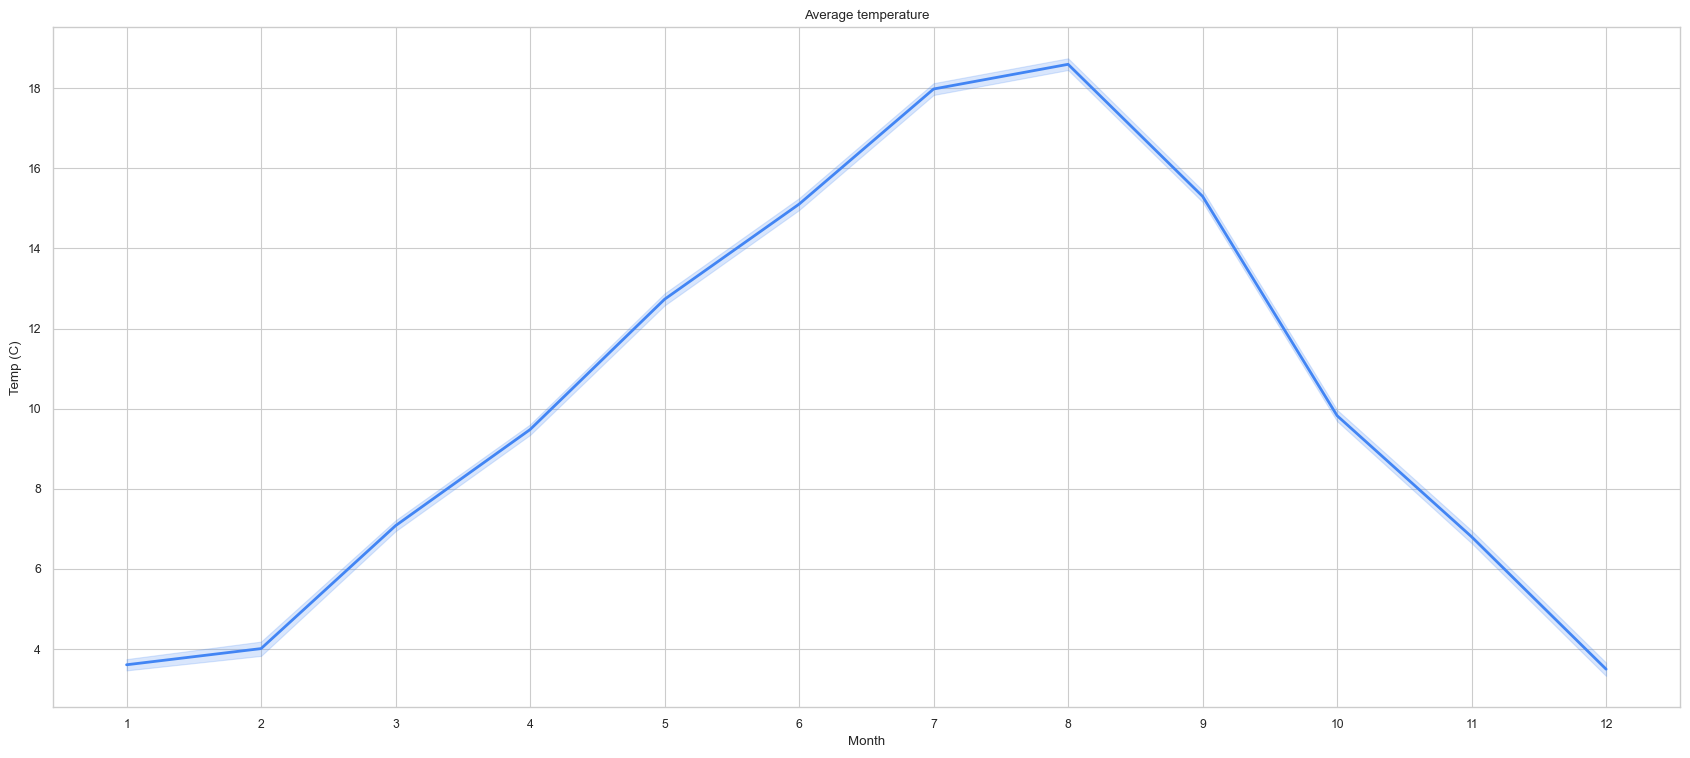

In [8]:
sns.lineplot(df['Month'], df['Temp (C)'], lw=2)
plt.xticks(np.arange(1, 13, 1))
plt.title("Average temperature")
plt.show()

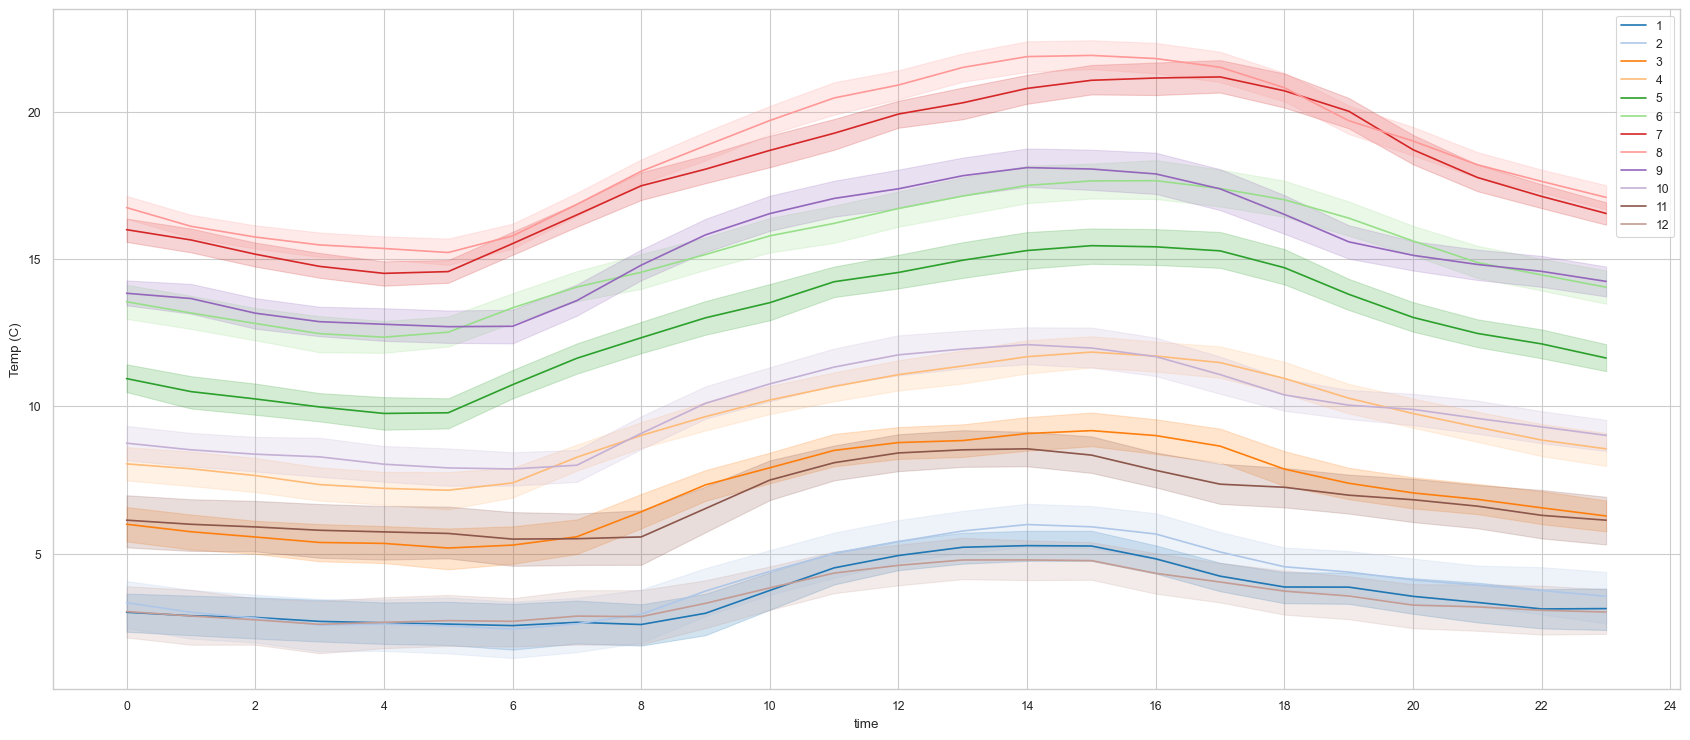

In [11]:
sns.set_palette("tab20", 12)

for i in range(1, 13):
    dfs = df[df['Month'] == i]
    sns.lineplot(x=dfs["Date/Time"].dt.hour, y=dfs["Temp (C)"], label=f"{i}")
    
plt.xlabel("time")
plt.xticks(np.arange(0, 25, 2))
plt.show()